# All Basemodels aggregated

<Axes: >

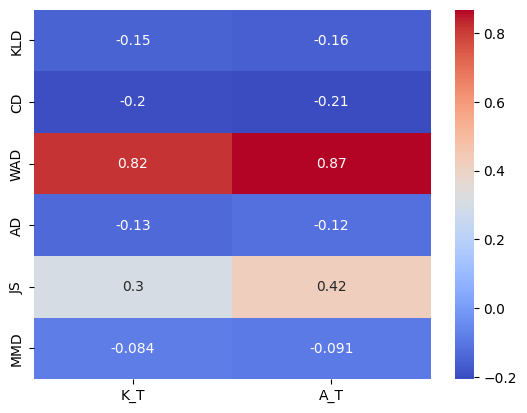

In [18]:
import seaborn as sb
import pandas as pd
df = pd.read_csv("../result_data/results_DT.csv", ";", decimal = ",") 
df = df.append( pd.read_csv("../result_data/results_LS.csv", ";", decimal = ",") )
df = df.append( pd.read_csv("../result_data/results_SVR.csv", ";", decimal = ",") )
corr = df.corr()
corr= corr.iloc[10:,[2,4]]
sb.heatmap(corr, cmap="coolwarm", annot=True)

<Axes: >

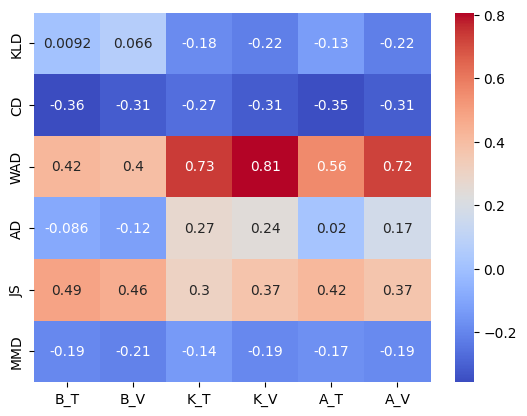

In [104]:
import seaborn as sb
import pandas as pd
df = pd.read_csv("results_DT_2.csv", ";", decimal = ",") 
df = df.append( pd.read_csv("results_LS_2.csv", ";", decimal = ",") )
df = df.append( pd.read_csv("results_KN_2.csv", ";", decimal = ",") )
corr = df.corr()
corr= corr.iloc[10:,[0,1,2,3,4,5]]
sb.heatmap(corr, cmap="coolwarm", annot=True)
#macht kein Sinn weil zu unterschiedlich

# All Basemodels seperatly

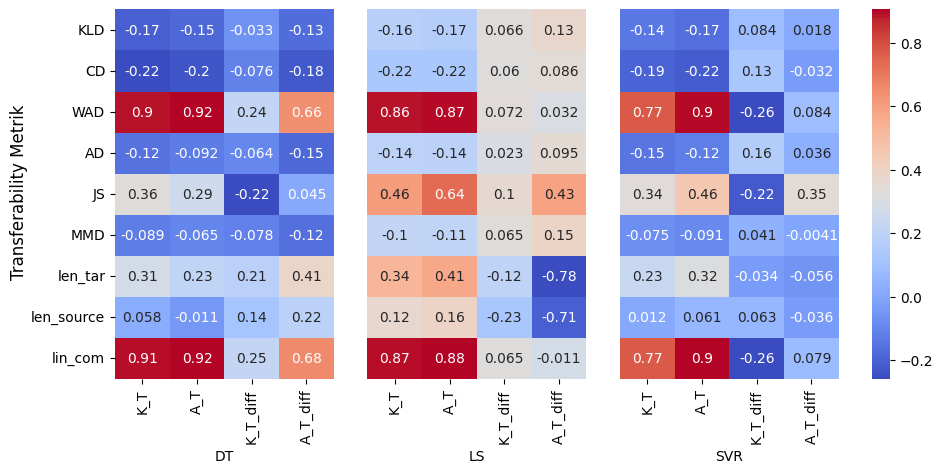

In [179]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

df_DT = pd.read_csv("../result_data/results_DT.csv", ";", decimal = ",") 
df_LS = pd.read_csv("../result_data/results_LS.csv", ";", decimal = ",") 
df_KN = pd.read_csv("../result_data/results_SVR.csv", ";", decimal = ",")

df_DT["lin_com"] = df_DT["WAD"] + df_DT["len_tar"]
df_LS["lin_com"] = df_DT["WAD"] + df_DT["len_tar"]
df_KN["lin_com"] = df_DT["WAD"] + df_DT["len_tar"]


corr_DT = df_DT.corr()
corr_DT= corr_DT.iloc[10:,[2,4,6,8]]

corr_LS = df_LS.corr()
corr_LS= corr_LS.iloc[10:,[2,4,6,8]]

corr_KN = df_KN.corr()
corr_KN= corr_KN.iloc[10:,[2,4,6,8]]

f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]})
#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(corr_DT, cmap="coolwarm", cbar=False,ax=ax1,annot=True)
g1.set_ylabel('')
g1.set_xlabel('DT')
g2 = sns.heatmap(corr_LS, cmap="coolwarm", cbar=False,ax=ax2,annot=True)
g2.set_ylabel('')
g2.set_xlabel('LS')
g2.set_yticks([])
g3 = sns.heatmap(corr_KN, cmap="coolwarm", ax=ax3, cbar_ax=axcb,annot=True)
g3.set_ylabel('')
g3.set_xlabel('SVR')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.supylabel('Transferability Metrik')
f.set_figwidth(10) 

plt.show()

# Forecast RSME

### Forecast with justt 

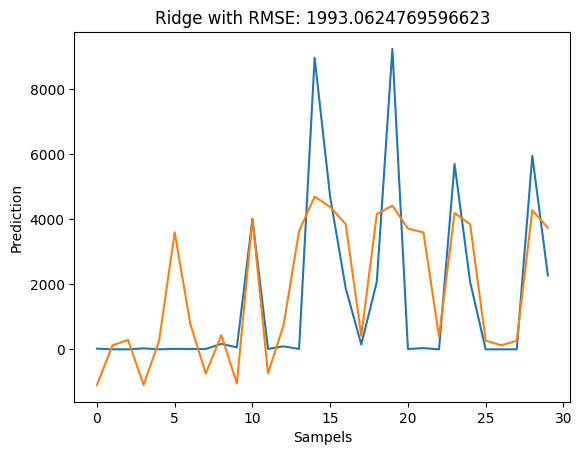

In [176]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn

df = pd.read_csv("../result_data/results_DT.csv", ";", decimal = ",") 
df = df.append( pd.read_csv("../result_data/results_LS.csv", ";", decimal = ",") )
df = df.append( pd.read_csv("../result_data/results_SVR.csv", ";", decimal = ",") )
df.fillna(0, inplace=True)

X_train, X_test, y_train, y_test= train_test_split(df.iloc[:,[11,14,16]], df.iloc[:,[2]], random_state=0)

clf = RidgeCV()
clf.fit(X_train, y_train)

y_pre = clf.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pre)

plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre)
plt.title('Ridge with RMSE: '+ str(np.sqrt(mse)))
plt.xlabel('Sampels')
plt.ylabel('Prediction')
plt.show()

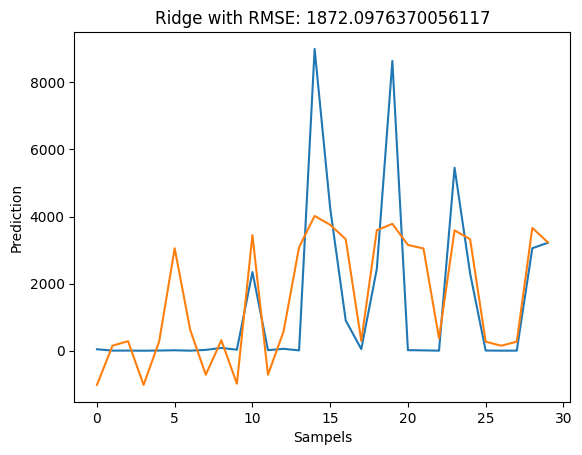

In [177]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn

df = pd.read_csv("../result_data/results_DT.csv", ";", decimal = ",") 
df = df.append( pd.read_csv("../result_data/results_LS.csv", ";", decimal = ",") )
df = df.append( pd.read_csv("../result_data/results_SVR.csv", ";", decimal = ",") )
df.fillna(0, inplace=True)

X_train, X_test, y_train, y_test= train_test_split(df.iloc[:,[11,14,16]], df.iloc[:,[4]], random_state=0)

clf = RidgeCV()
clf.fit(X_train, y_train)

y_pre = clf.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pre)

plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre)
plt.title('Ridge with RMSE: '+ str(np.sqrt(mse)))
plt.xlabel('Sampels')
plt.ylabel('Prediction')
plt.show()

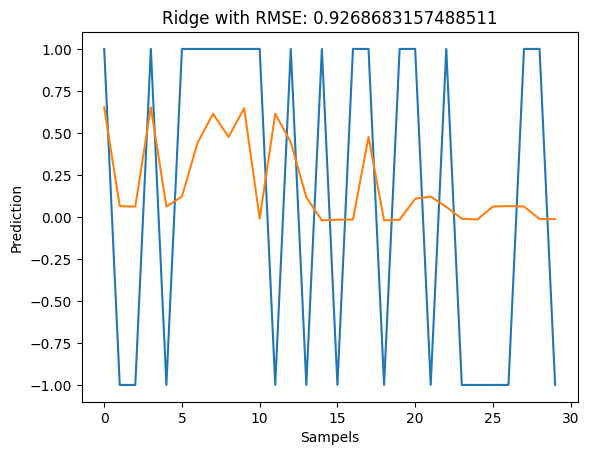

In [166]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn

df = pd.read_csv("../result_data/results_DT.csv", ";", decimal = ",") 
df = df.append( pd.read_csv("../result_data/results_LS.csv", ";", decimal = ",") )
df = df.append( pd.read_csv("../result_data/results_SVR.csv", ";", decimal = ",") )
df.fillna(0, inplace=True)

df["A_T_diff"][df ["A_T_diff"] > 0] = 1
df["A_T_diff"][df ["A_T_diff"] < 0] = -1

X_train, X_test, y_train, y_test= train_test_split(df.iloc[:,[11,14]], df.iloc[:,[8]], random_state=0)

clf = RidgeCV()
clf.fit(X_train, y_train)

y_pre = clf.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pre)

plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre)
plt.title('Ridge with RMSE: '+ str(np.sqrt(mse)))
plt.xlabel('Sampels')
plt.ylabel('Prediction')
plt.show()

In [126]:
df = pd.DataFrame(clf.coef_, columns = ["WAD","JS","len_tar"])
df

,WAD,JS,len_tar
0,0.000003,-1.086614,-0.000464
1,0.000031,1.847634,-0.000101


In [ ]:
clf.coef_

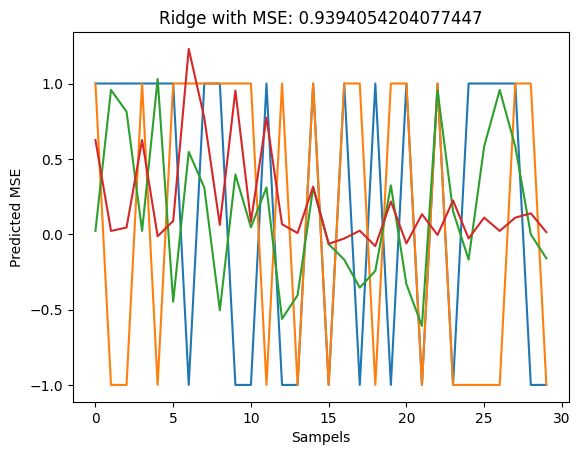

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../result_data/results_DT.csv", ";", decimal = ",") 
df = df.append( pd.read_csv("../result_data/results_LS.csv", ";", decimal = ",") )
df = df.append( pd.read_csv("../result_data/results_SVR.csv", ";", decimal = ",") )
df.fillna(0, inplace=True)

df["K_T_diff"][df ["K_T_diff"] > 0] = 1
df["K_T_diff"][df ["K_T_diff"] < 0] = -1
df["A_T_diff"][df ["A_T_diff"] > 0] = 1
df["A_T_diff"][df ["A_T_diff"] < 0] = -1

X_train, X_test, y_train, y_test= train_test_split(df.iloc[:,[10,11,12,13,14,15]], df.iloc[:,[6,8]], random_state=0)

clf = RidgeCV()
clf.fit(X_train, y_train)

y_pre = clf.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pre)

plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre)
plt.title('Ridge with MSE: '+ str(np.sqrt(mse)))
plt.xlabel('Sampels')
plt.ylabel('Predicted MSE')
plt.show()

In [191]:
df = pd.DataFrame(clf.coef_, columns = ["KLD","CD","WAD","AD","JS","MMD"])
df

,KLD,CD,WAD,AD,JS,MMD
0,0.000025,1.355900,0.000055,-0.811711,-0.325095,0.249858
1,0.000030,0.116888,0.000023,0.222987,0.489506,0.436844


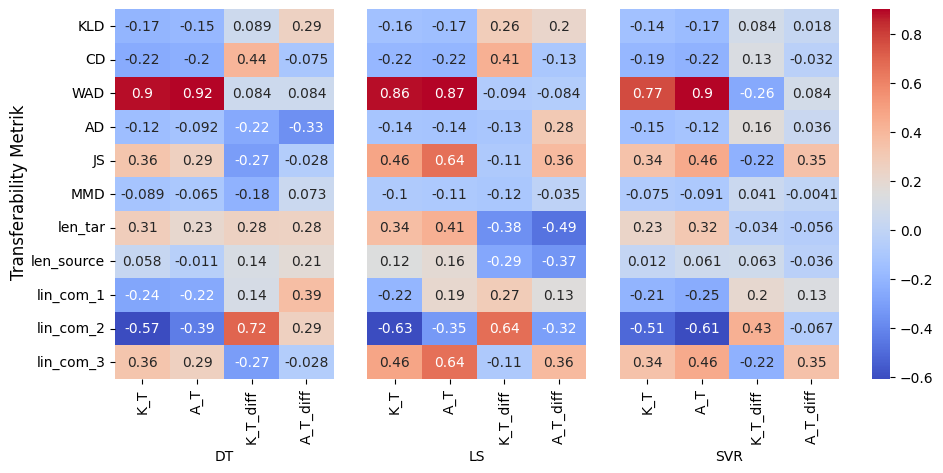

In [193]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

df_DT = pd.read_csv("../result_data/results_DT.csv", ";", decimal = ",") 
df_LS = pd.read_csv("../result_data/results_LS.csv", ";", decimal = ",") 
df_KN = pd.read_csv("../result_data/results_SVR.csv", ";", decimal = ",")

df_DT["K_T_diff"][df_DT ["K_T_diff"] > 0] = 1
df_DT["K_T_diff"][df_DT ["K_T_diff"] < 0] = -1
df_DT["A_T_diff"][df_DT ["A_T_diff"] > 0] = 1
df_DT["A_T_diff"][df_DT ["A_T_diff"] < 0] = -1

df_LS["K_T_diff"][df_LS ["K_T_diff"] > 0] = 1
df_LS["K_T_diff"][df_LS ["K_T_diff"] < 0] = -1
df_LS["A_T_diff"][df_LS ["A_T_diff"] > 0] = 1
df_LS["A_T_diff"][df_LS ["A_T_diff"] < 0] = -1

df_LS["K_T_diff"][df_LS ["K_T_diff"] > 0] = 1
df_LS["K_T_diff"][df_LS ["K_T_diff"] < 0] = -1
df_LS["A_T_diff"][df_LS ["A_T_diff"] > 0] = 1
df_LS["A_T_diff"][df_LS ["A_T_diff"] < 0] = -1


df_DT["lin_com_1"] = 0.007284 * df_DT["KLD"] +1.355900 * df_DT["CD"] + 0.000055 * df_DT["WAD"] + -0.811711 * df_DT["AD"] + -0.325095 * df_DT["JS"] + 0.249858 * df_DT["MMD"]
df_LS["lin_com_1"] = 0.007284 * df_DT["KLD"] +1.355900 * df_DT["CD"] + 0.000055 * df_DT["WAD"] + -0.811711 * df_DT["AD"] + -0.325095 * df_DT["JS"] + 0.249858 * df_DT["MMD"]
df_KN["lin_com_1"] =  0.007284 * df_DT["KLD"] +1.355900 * df_DT["CD"] + 0.000055 * df_DT["WAD"] + -0.811711 * df_DT["AD"] + -0.325095 * df_DT["JS"] + 0.249858 * df_DT["MMD"]

df_DT["lin_com_2"] = 0.000026 * df_DT["KLD"] + 1.386681 * df_DT["CD"] + 0.000048 * df_DT["WAD"] + -0.784426 * df_DT["AD"] + -0.268964 * df_DT["JS"] +  0.305468   * df_DT["MMD"] + 0.000628 * df_DT["len_tar"] + -0.00012 * df_DT["len_source"] 
df_LS["lin_com_2"] = 0.000026 * df_DT["KLD"] + 1.386681 * df_DT["CD"] + 0.000048 * df_DT["WAD"] + -0.784426 * df_DT["AD"] + -0.268964 * df_DT["JS"] + 0.305468 * df_DT["MMD"] + 0.000628 * df_DT["len_tar"] + -0.00012 * df_DT["len_source"] 
df_KN["lin_com_2"] = 0.000026 * df_DT["KLD"] + 1.386681 * df_DT["CD"] + 0.000048 * df_DT["WAD"] + -0.784426 * df_DT["AD"] + -0.268964 * df_DT["JS"] + 0.305468 * df_DT["MMD"] + 0.000628 * df_DT["len_tar"] + -0.00012 * df_DT["len_source"] 

df_DT["lin_com_3"] = 0.000015 * df_DT["WAD"] +1.847634 * df_DT["JS"] + -0.000201 * df_DT["len_tar"]
df_LS["lin_com_3"] = 0.000015 * df_DT["WAD"] +1.847634 * df_DT["JS"] + -0.000201 * df_DT["len_tar"]
df_KN["lin_com_3"] = 0.000015 * df_DT["WAD"] +1.847634 * df_DT["JS"] + -0.000201 * df_DT["len_tar"]

corr_DT = df_DT.corr()
corr_DT= corr_DT.iloc[10:,[2,4,6,8]]

corr_LS = df_LS.corr()
corr_LS= corr_LS.iloc[10:,[2,4,6,8]]

corr_KN = df_KN.corr()
corr_KN= corr_KN.iloc[10:,[2,4,6,8]]

f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]})
#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(corr_DT, cmap="coolwarm", cbar=False,ax=ax1,annot=True)
g1.set_ylabel('')
g1.set_xlabel('DT')
g2 = sns.heatmap(corr_LS, cmap="coolwarm", cbar=False,ax=ax2,annot=True)
g2.set_ylabel('')
g2.set_xlabel('LS')
g2.set_yticks([])
g3 = sns.heatmap(corr_KN, cmap="coolwarm", ax=ax3, cbar_ax=axcb,annot=True)
g3.set_ylabel('')
g3.set_xlabel('SVR')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.supylabel('Transferability Metrik')
f.set_figwidth(10) 

plt.show()

<Axes: >

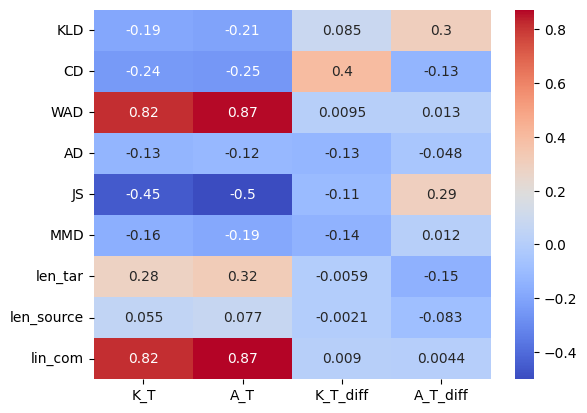

In [180]:
import seaborn as sb
import pandas as pd
df = pd.read_csv("../result_data/results_DT.csv", ";", decimal = ",") 
df = df.append( pd.read_csv("../result_data/results_LS.csv", ";", decimal = ",") )
df = df.append( pd.read_csv("../result_data/results_SVR.csv", ";", decimal = ",") )
df.fillna(0, inplace=True)

df["K_T_diff"][df ["K_T_diff"] > 0] = 1
df["K_T_diff"][df ["K_T_diff"] < 0] = -1
df["A_T_diff"][df ["A_T_diff"] > 0] = 1
df["A_T_diff"][df ["A_T_diff"] < 0] = -1

df["lin_com"] = df_DT["WAD"] + df_DT["len_tar"]

corr = df.corr()
corr= corr.iloc[10:,[2,4,6,8]]
sb.heatmap(corr, cmap="coolwarm", annot=True)